# PROJECT GOAL 

THE GOAL OF THIS PROJECT IS TO PREDICT THE PROBABILITY OF ANY STUDENT GRADUATING FROM THE COLLEGE BEING ADMITTED INTO MASTERS PROGRAM 

# PROJECT STATEMENT 

    - This project would focus on predicting the chances of any student getting into masters program.

    - Regression model would be developed to prediction

# DATASET CONTENT

The dataset has 9 columns (field) and 400 rows

The below explains the parameters adopted

        1. GRE Scores ( out of 340 )
        2. TOEFL Scores ( out of 120 )
        3. University Rating ( out of 5 )
        4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
        5. Undergraduate GPA ( out of 10 )
        6. Research Experience ( either 0 or 1 )
        7. Chance of Admit ( ranging from 0 to 1 )
       
       
       
The dependent variable is Admission Chance into the Masters Program ranging between 0 and 1 

The dependent variable will be predicted by 7 independent variable 

# DATASET SOURCE

    The dataset is a real dataset 
    
    Source from: https://www.kaggle.com/mohansacharya/graduate-admissions

# Project Workflow

# Step 1: Libraries Import

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Import Dataset

In [9]:
# import dataset and store it

admission_df = pd.read_csv('Admission.csv', index_col = 'Serial No.')

In [10]:
# reading the data

admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


# Step 3: Analizing the Dataset

In [11]:
admission_df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admission Chance     0
dtype: int64

In [13]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [14]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Step 4: Visualize Dataset

In [15]:
# visualizing through distribution
# column names extraction

columns_headers = admission_df.columns.values
columns_headers

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Admission Chance'], dtype=object)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

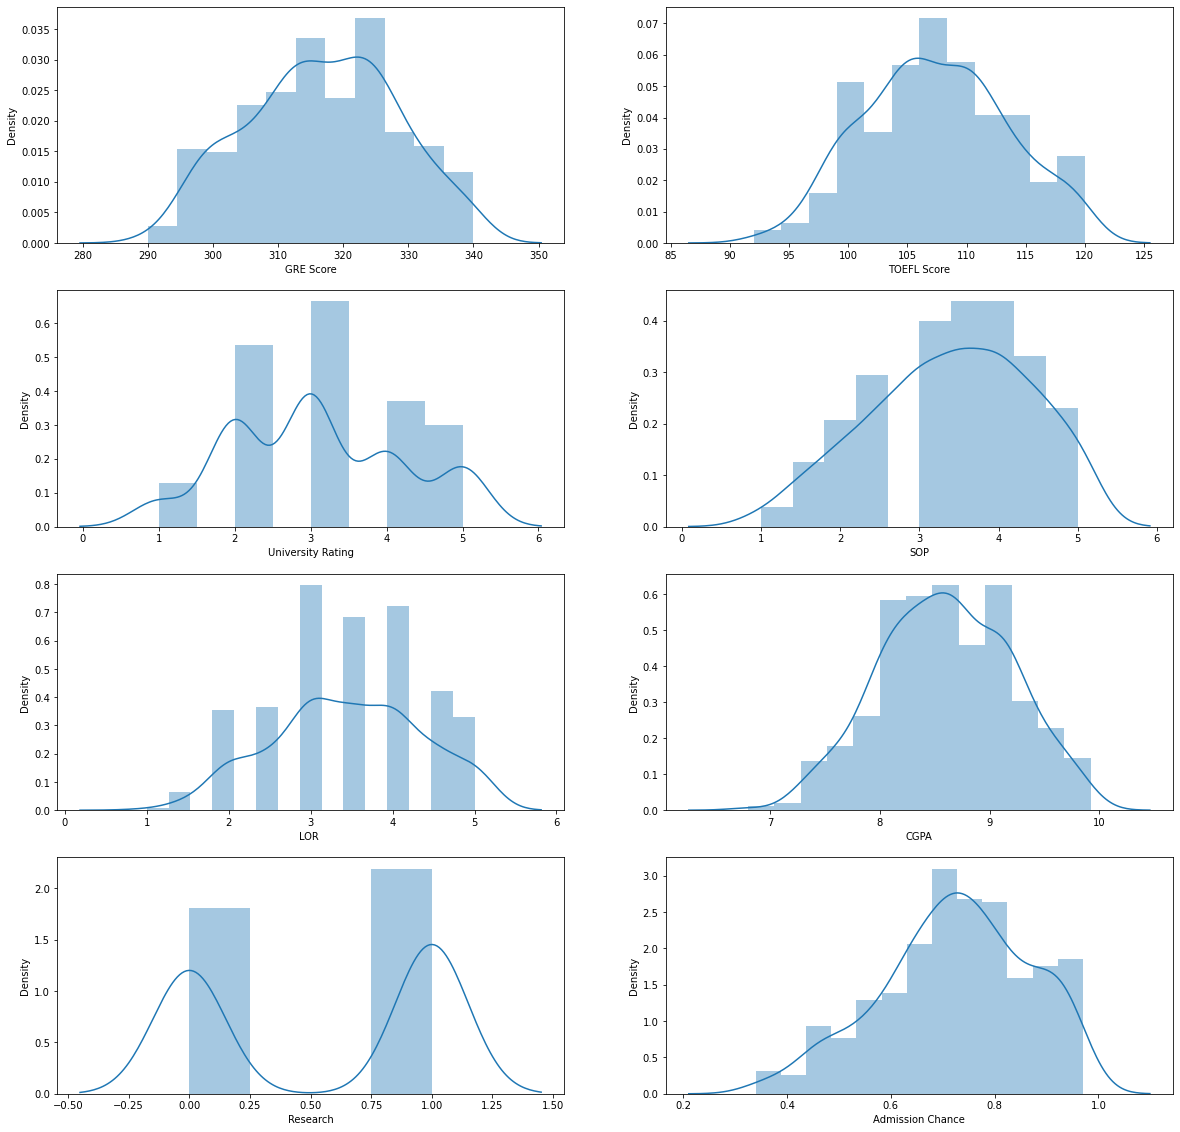

In [22]:
# creating a for loop to plot the values 

i = 1
fig, ax = plt.subplots(4, 2, figsize = (20, 20))

for element in columns_headers:
    plt.subplot(4,2,i)
    sns.distplot(admission_df[element])
    i = i + 1

<AxesSubplot:>

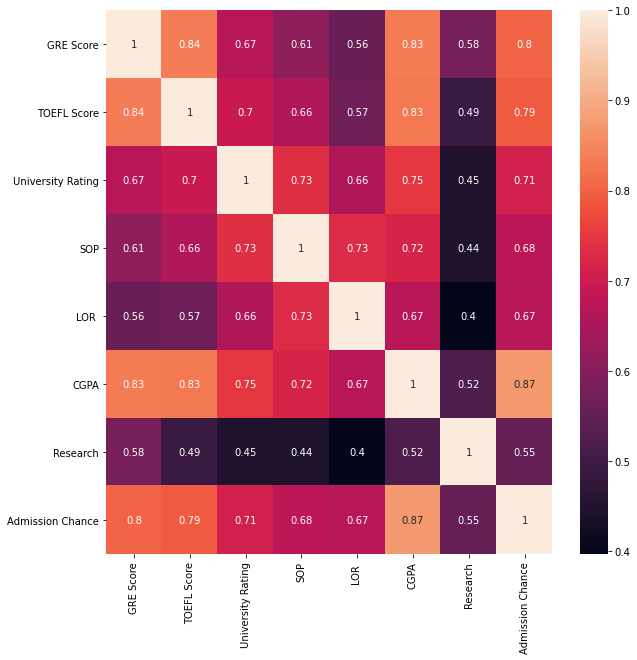

In [23]:
# checking the correlation between variables
# using .heatmap() function from seaborn

plt.figure(figsize = (10,10))
sns.heatmap(admission_df.corr(), annot = True)

# showing the actual value with annot arguement 

Note: any corr value from 0.9 above is perfectly correlated. so in this visual, it's shown in lite colour 

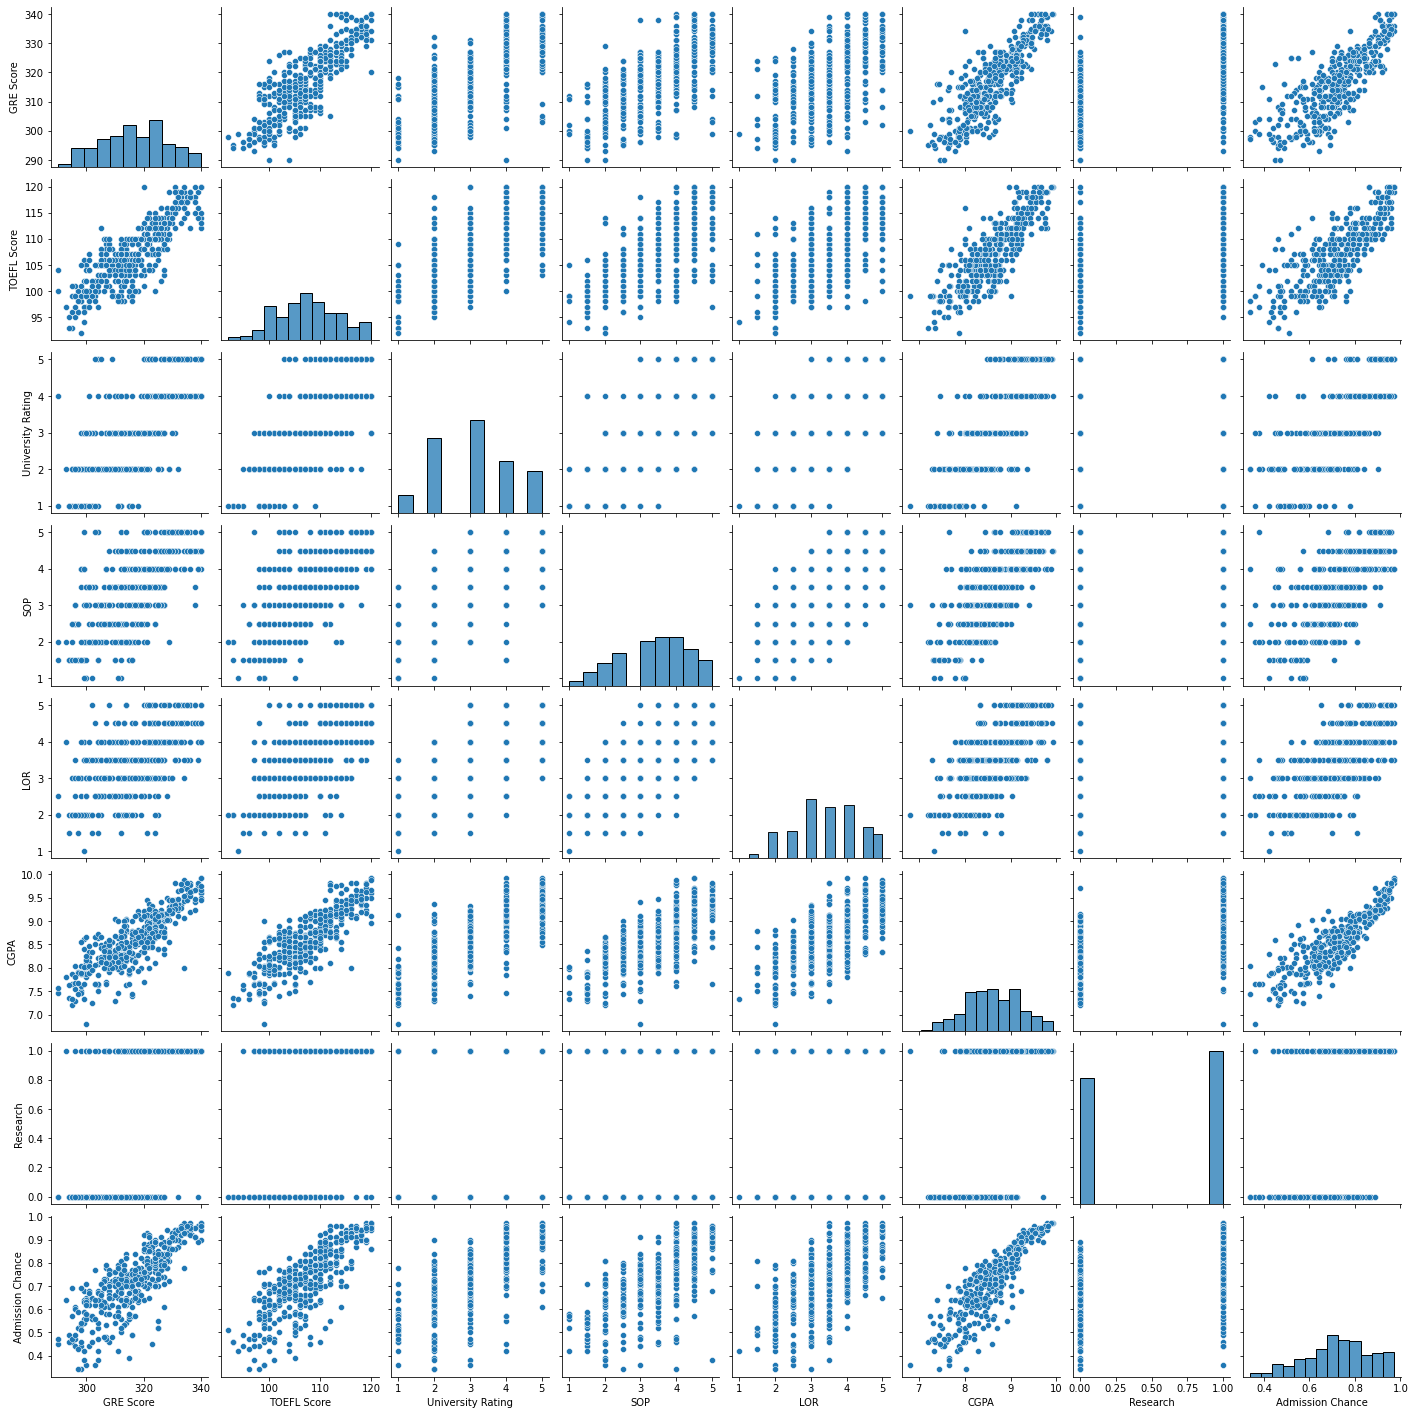

In [24]:
# plotting every variable through pairplot

sns.pairplot(admission_df)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/

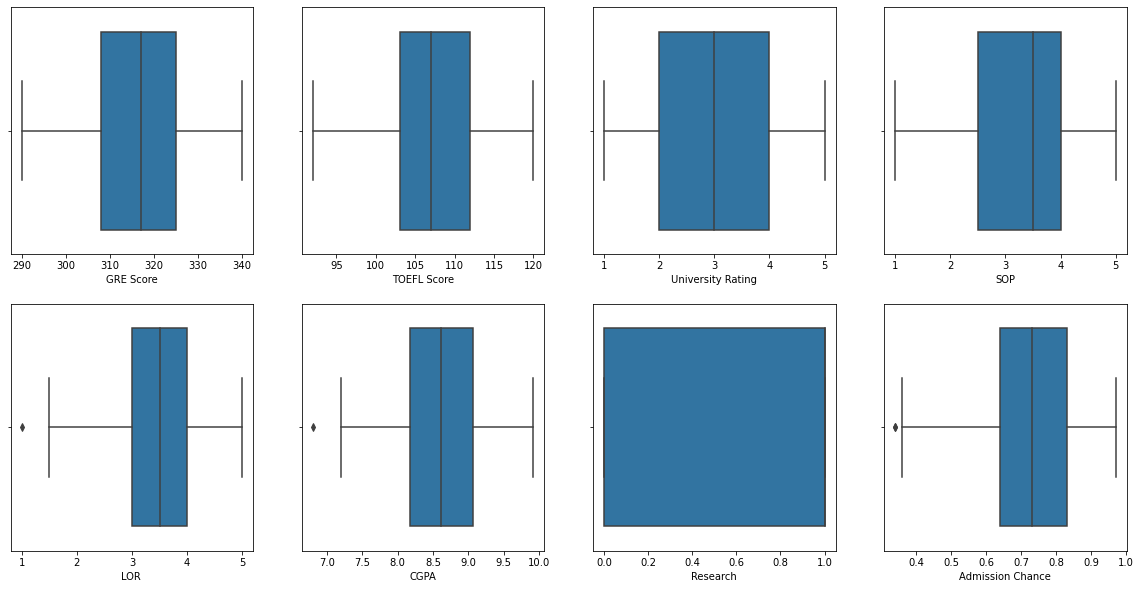

In [27]:
# plotting a box plot 

i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 10))

for element in columns_headers:
    plt.subplot(2,4,i)
    sns.boxplot(admission_df[element])
    i = i + 1

# Step 5: Creating Training and Testing Dataset

<AxesSubplot:ylabel='Serial No.'>

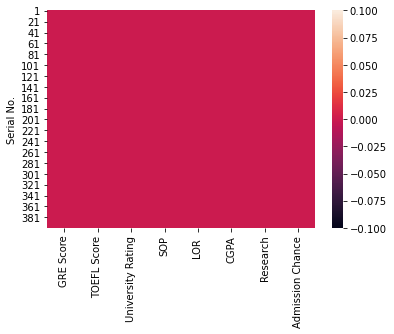

In [28]:
# checking null element in the data with heatmap

sns.heatmap(admission_df.isnull())

There is no null data in the dataset

In [30]:
# distribute the dataset across the dependent and
# independent variable 

X = admission_df.drop(['Admission Chance'], axis = 1)

In [34]:
X

# independent variables

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1
397,325,107,3,3.0,3.5,9.11,1
398,330,116,4,5.0,4.5,9.45,1


In [32]:
y = admission_df['Admission Chance']

In [35]:
y

# dependent variable

Serial No.
1      0.92
2      0.76
3      0.72
4      0.80
5      0.65
       ... 
396    0.82
397    0.84
398    0.91
399    0.67
400    0.95
Name: Admission Chance, Length: 400, dtype: float64

In [37]:
# importing sklearn to split the dataset


from sklearn.model_selection import train_test_split

In [38]:
# splitting 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [39]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
237,325,112,4,4.0,4.5,9.17,1
52,312,100,2,1.5,3.5,7.90,1
346,316,98,1,1.5,2.0,7.43,0
189,331,115,5,4.5,3.5,9.36,1
165,329,111,4,4.5,4.0,9.01,1
...,...,...,...,...,...,...,...
204,334,120,5,4.0,5.0,9.87,1
75,314,106,3,3.0,5.0,8.90,0
151,334,114,4,4.0,4.0,9.43,1


In [40]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
366,330,114,4,4.5,3.0,9.17,1
229,318,112,3,4.0,3.5,8.67,0
313,311,107,4,4.5,4.5,9.00,1
122,334,119,5,4.5,4.5,9.48,1
232,319,106,3,3.5,2.5,8.33,1
...,...,...,...,...,...,...,...
43,313,107,2,2.5,2.0,8.50,1
67,327,114,3,3.0,3.0,9.02,0
294,312,98,1,3.5,3.0,8.18,1


In [41]:
y_train

Serial No.
237    0.85
52     0.56
346    0.49
189    0.93
165    0.81
       ... 
204    0.97
75     0.74
151    0.93
306    0.74
228    0.64
Name: Admission Chance, Length: 320, dtype: float64

In [42]:
y_test

Serial No.
366    0.86
229    0.71
313    0.78
122    0.94
232    0.74
       ... 
43     0.53
67     0.61
294    0.64
289    0.82
259    0.77
Name: Admission Chance, Length: 80, dtype: float64

In [43]:
X_train.shape

(320, 7)

In [44]:
X_test.shape

(80, 7)

# Step 6: Training Model 

In [45]:
# importing linear regression from sklearn 

from sklearn.linear_model import LinearRegression

In [46]:
regressor = LinearRegression(fit_intercept = True)

In [47]:
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
# visualizing the coefficients

print('Linear Model Coefficients (m):', regressor.coef_)
print('Linear Model Coefficients (b):', regressor.intercept_)

Linear Model Coefficients (m): [ 0.00187524  0.00314909  0.00589897 -0.00547941  0.019305    0.12151328
  0.02883232]
Linear Model Coefficients (b): -1.3334073986098474


In [49]:
# showing the coefficient of independent varibles of the model in dataframe

coeff_df = pd.DataFrame(regressor.coef_,
                       X.columns,
                       columns = ['Coefficient'])

coeff_df

,Coefficient
GRE Score,0.001875
TOEFL Score,0.003149
University Rating,0.005899
SOP,-0.005479
LOR,0.019305
CGPA,0.121513
Research,0.028832


# Step 7: Evaluating Model

In [50]:
# predicting the dependent variable through the model
# by supplying it with X_test data

y_predict = regressor.predict(X_test)

In [51]:
y_predict

array([0.84437924, 0.73248251, 0.79500639, 0.94015123, 0.68641571,
       0.82618757, 0.71864795, 0.66142462, 0.96279459, 0.79328821,
       0.67484424, 0.53469133, 0.75935493, 0.66309639, 0.63615099,
       0.7214596 , 0.80289262, 0.51617904, 0.81396768, 0.56787659,
       0.50620388, 0.96622065, 0.78884999, 0.79030611, 0.67928049,
       0.71004917, 0.54886878, 0.68828438, 0.47207422, 0.79061654,
       0.63474333, 0.71996468, 0.85577696, 0.49925663, 0.58724116,
       0.56208163, 0.74654326, 0.59495676, 0.64994027, 0.82894085,
       0.65120653, 0.70373494, 0.44140482, 0.9839556 , 0.81878677,
       0.53722666, 0.71389566, 0.59475787, 0.82044234, 0.55853538,
       0.74027639, 0.51713801, 0.64529302, 0.76221255, 0.68852419,
       0.72720274, 0.91091894, 0.76865798, 0.65034247, 0.78958648,
       0.86709151, 0.68986269, 0.7138436 , 0.59831208, 0.86186773,
       0.95236214, 0.61990324, 0.64499581, 0.60098961, 0.81557896,
       0.96375835, 0.69820488, 0.61716607, 0.7078423 , 0.78632

Text(0, 0.5, 'Model Predictions')

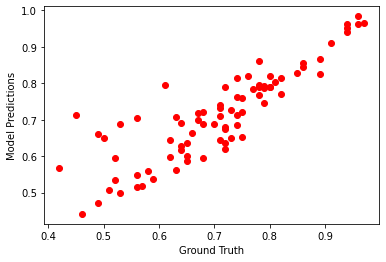

In [52]:
# visualizing the model predictions vs true labe
# (ground truth)

plt.scatter(y_test, y_predict, color = 'red')
plt.xlabel('Ground Truth')
plt.ylabel('Model Predictions')

Note: If the model predictions matches the True value, we should see perfect or slightly perfect 45 degree line 

this says that the model has good performance 

    APPLYING KEY PERFORMANCE METRICS

PERFORMING THE METRICS THROUGH;

        MSE
        MAE
        RMSE
        MAPE
        MPE
        R2
        AND ADJUSTED R2

In [57]:
# checking the numbers of independent parameters for 
# testing

k = X_test.shape[1]
k

7

In [99]:
# calling the length of independent variable 
# X_test only

n = X_test.shape[0]
n

80

In [59]:
# importing the metrics from sklearn 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [60]:
# since we want import RMSE
# we would just need to perform square to MSE
# so math module would do just that 

from math import sqrt

# calculation to RMSE 

RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict)), '.3f'))

In [61]:
# calculation for MSE

MSE = mean_squared_error(y_test, y_predict)

In [62]:
# calculation for MAE

MAE = mean_absolute_error(y_test, y_predict)

In [63]:
# for r2

r2 = r2_score(y_test, y_predict)

In [64]:
# for adjusted error

adj = 1-(1-r2) * (n-1)/(n-k-1)

In [65]:
# for MAPE

MAPE = np.mean( np.abs( (y_test - y_predict) / y_test ) ) * 100

In [66]:
# for MPE

MPE = np.mean( (y_test - y_predict) / y_test ) * 100

In [67]:
print('RMSE = ', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nr2 = ', r2, '\nAdjusted R2 = ', adj, '\nMAPE = ', MAPE, '\nMPE = ', MPE )

RMSE =  0.066 
MSE =  0.004414697874528668 
MAE =  0.04480643401810357 
r2 =  0.7395936180864362 
Adjusted R2 =  0.7142763309559508 
MAPE =  7.339265359125517 
MPE =  -1.90442754800541


# Step 8: Retraining the model

    CHECKING THE METRICS AGAIN WHETHER THE METRICS WOULD GIVE GOOD OUTCOME IF THE MODEL IS TRAINED WITH TWO INDEPENDENT VARIABLE 

    HERE, WE WOULD BE TRAINING THE MODEL AGAIN CHOOSING:
                    GRE SCORE, 
                    AND TOEFL SCORE

In [84]:
X2 = admission_df[['GRE Score', 'TOEFL Score']]

In [85]:
X2

,GRE Score,TOEFL Score
Serial No.,,
1,337,118
2,324,107
3,316,104
4,322,110
5,314,103
...,...,...
396,324,110
397,325,107
398,330,116


In [86]:
y2 = admission_df['Admission Chance']
y2

Serial No.
1      0.92
2      0.76
3      0.72
4      0.80
5      0.65
       ... 
396    0.82
397    0.84
398    0.91
399    0.67
400    0.95
Name: Admission Chance, Length: 400, dtype: float64

In [87]:
# splitting 

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

In [88]:
X2_train.shape

(320, 2)

In [89]:
X2_test.shape

(80, 2)

In [90]:
# model 2

regressor2 = LinearRegression(fit_intercept = True)

In [91]:
regressor2.fit(X2_train, y2_train)

LinearRegression()

In [92]:
# visualizing the coefficients

print('Linear Model Coefficients (m):', regressor2.coef_)
print('Linear Model Coefficients (b):', regressor2.intercept_)

Linear Model Coefficients (m): [0.00519703 0.01054756]
Linear Model Coefficients (b): -2.0571457034569525


In [93]:
# showing the coefficient of independent varibles of the model in dataframe

coeff_df = pd.DataFrame(regressor2.coef_,
                       X2.columns,
                       columns = ['Coefficient'])

coeff_df

,Coefficient
GRE Score,0.005197
TOEFL Score,0.010548


In [94]:
# predicting the dependent variable through the model
# by supplying it with X_test data

y_predict2 = regressor2.predict(X2_test)
y_predict

array([0.91363843, 0.85588697, 0.87168148, 0.69725242, 0.90515383,
       0.67627395, 0.56218833, 0.83891777, 0.86248823, 0.5588877 ,
       0.74581063, 0.60932925, 0.47827443, 0.59377733, 0.88204942,
       0.9261323 , 0.86508022, 0.61192123, 0.70573702, 0.76938109,
       0.81723065, 0.96407998, 0.94640213, 0.71493027, 0.74840261,
       0.81723065, 0.9103378 , 0.58057482, 0.67627395, 0.79366019,
       0.70644566, 0.76537182, 0.56548896, 0.67368196, 0.6755653 ,
       0.72412351, 0.60744591, 0.8349085 , 0.93720889, 0.46578055,
       0.76348847, 0.71493027, 0.64539358, 0.79295155, 0.53744317,
       0.63502564, 0.6585961 , 0.83231651, 0.5831668 , 0.81463867,
       0.56808094, 0.69725242, 0.68947646, 0.49854426, 0.88865068,
       0.64468494, 0.92283167, 0.69654378, 0.79884416, 0.82312327,
       0.93980087, 0.78116632, 0.91363843, 0.88935932, 0.83820913,
       0.77197307, 0.86508022, 0.9431015 , 0.78116632, 0.69466043,
       0.80803741, 0.78705893, 0.71233828, 0.67368196, 0.81723

Text(0, 0.5, 'Model Predictions')

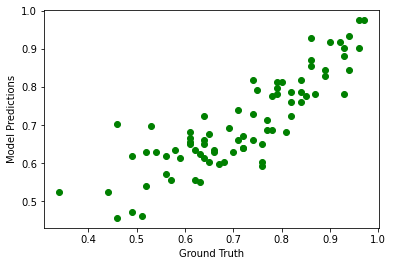

In [96]:
# visualizing the model predictions vs true labe
# (ground truth)

plt.scatter(y2_test, y_predict2, color = 'green')
plt.xlabel('Ground Truth')
plt.ylabel('Model Predictions')

In [98]:
# checking the numbers of independent parameters for 
# testing

k = X2_test.shape[1]
k

2

In [100]:
# calling the length of independent variable 
# X_test only

n = X_test.shape[0]
n

80

In [108]:
RMSE = float(format(np.sqrt(mean_squared_error(y2_test,y_predict2)), '.3f'))
MSE = mean_squared_error(y2_test, y_predict2)
MAE = mean_absolute_error(y2_test, y_predict2)
r2 = r2_score(y2_test, y_predict2)
adj = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y2_test - y_predict2) / y2_test ) ) * 100
MPE = np.mean( (y2_test - y_predict2) / y2_test ) * 100

In [109]:
print('RMSE = ', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nr2 = ', r2, '\nAdjusted R2 = ', adj, '\nMAPE = ', MAPE, '\nMPE = ', MPE )


RMSE =  0.075 
MSE =  0.005575384943955 
MAE =  0.05751358028220845 
r2 =  0.7305664159931016 
Adjusted R2 =  0.7235681410838315 
MAPE =  8.87598338475984 
MPE =  0.04067031788528786


    COMPARING THE TWO OUTCOMES
    
    

                FIRST OUTCOME
    
        RMSE =  0.066 
        MSE =  0.004414697874528668 
        MAE =  0.04480643401810357 
        r2 =  0.7395936180864362 
        Adjusted R2 =  0.7142763309559508 
        MAPE =  7.339265359125517 
        MPE =  -1.90442754800541  
        
                SECOND OUTCOME

        RMSE =  0.075 
        MSE =  0.005575384943955 
        MAE =  0.05751358028220845 
        r2 =  0.7305664159931016 
        Adjusted R2 =  0.7235681410838315 
        MAPE =  8.87598338475984 
        MPE =  0.04067031788528786

# Step 9: Visualizing the Result

In [118]:
# creating a mesh grid
# from the two independent variable in the train model two 
# using linspace

x_surf, y_surf = np.meshgrid(np.linspace(admission_df['GRE Score'].min(),
                                        admission_df['GRE Score'].max(),100),
                                        np.linspace(admission_df['TOEFL Score'].min(),
                                        admission_df['TOEFL Score'].max(),100))
onlyX = pd.DataFrame({'GRE Score': x_surf.ravel(),
                     'TOEFL Score': y_surf.ravel()})

fittedY = regressor2.predict(onlyX)
fittedY = fittedY.reshape(x_surf.shape)

Text(0.5, 0, 'Admission Chance')

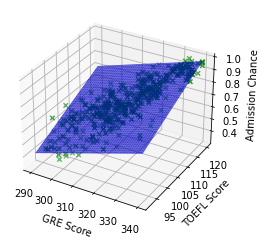

In [120]:
# plotting the 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( admission_df['GRE Score'],
            admission_df['TOEFL Score'],
           admission_df['Admission Chance'],
          c = 'green',
          marker = 'x')
ax.plot_surface(x_surf, y_surf, fittedY, color = 'blue',
               alpha = 0.7)
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Admission Chance')

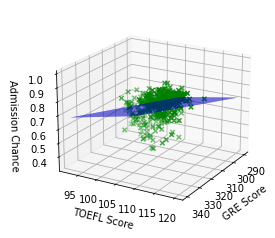

In [121]:
# plotting the 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( admission_df['GRE Score'],
            admission_df['TOEFL Score'],
           admission_df['Admission Chance'],
          c = 'green',
          marker = 'x')
ax.plot_surface(x_surf, y_surf, fittedY, color = 'blue',
               alpha = 0.7)
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Admission Chance')
ax.view_init(20, 30)
plt.show()

THE TRAINED MODEL 2 WORKS AS TRAINED MODEL ONE 

ANY OF THEM CAN BE DEPLOYED TO MAKE PREDICTIONS ON ADMISSION CHANCE 